In [62]:
import numpy as np
import math
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-02-16 13:01:41,123: Credentials are already in use. The existing account in the session will be replaced.


### Enter two numbers either positive or negative which will be compared

In [63]:
number_1 = int(input("Enter First  Number: "))
number_2 = int(input("Enter Second Number: "))


Enter First  Number:  -3
Enter Second Number:  -1


### Now we will determine the number of qubits required to represent larger number

In [66]:
n = math.ceil(math.log2(max(abs(number_1), abs(number_2)))) #Taking absolute value of numbers as negative numbers are part of input so avoid math domain error

### Now we will create a quantum circuit with 2 * (number_of_qbits) + 1

In [67]:
qc = QuantumCircuit(n+1, 1)

### Convert the numbers to two's complement so that we can handle negative numbers

In [68]:
number_1_bits = '{0:b}'.format(abs(number_1)).zfill(n)
number_2_bits = '{0:b}'.format(abs(number_2)).zfill(n)

if number_1 < 0:
    number_1_bits = ''.join(['1' if cbit == '0' else '0' for cbit in number_1_bits])
    number_2_bits = '{0:b}'.format(int(number_1_bits, 2) + 1).zfill(n)
if number_2 < 0:
    number_2_bits = ''.join(['1' if cbit == '0' else '0' for cbit in number_2_bits])
    number_2_bits = '{0:b}'.format(int(number_2_bits, 2) + 1).zfill(n)

### We are going to load the binary representation of larger number in first n qubits

In [69]:
for i in range(n):
    if number_2_bits[i] == '1':
        qc.x(i)
for i in range(n):
    if number_1_bits[i] == '1':
        qc.x(i)

### We are going to apply hadamard gate to these n qubits to create an equal superpostion

In [70]:
for i in range(n):
    qc.h(i)

In [71]:
### Apply Phase Shift Gate to last qubit
qc.cz(n-1, n)
### Now apply hadamard gate on last qubit as well
qc.h(n)

### Now for the answer we measure the last qubit, If we get ket 0 then number_1 is larger than number_2 otherwise it will be number_2

In [72]:
qc.measure(n, 0)


In [73]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1).result()
count = result.get_counts()

if '0' in count:
    if number_1 >= 0:
        print(number_1, "is greater than", number_2)
    else:
        print(number_2, "is greater than", number_1)
else:
    if number_2 >= 0:
        print(number_2, "is greater than", number_1)
    else:
        print(number_1, "is greater than", number_2)

-1 is greater than -3


## Here's the circuit for the above algorithm

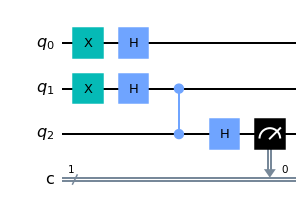

In [75]:
qc.draw('mpl')